In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/africa-conflict-19972020/Africa_1997-2020_Jan08.csv


# Intro

This notebook is made after taking help from Oluwafemi's Notebook and adding onto that. Please check his notebook for more detailed analysis.

In [2]:
data = pd.read_csv("/kaggle/input/africa-conflict-19972020/Africa_1997-2020_Jan08.csv",sep=";")

In [3]:
data

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,01-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,02-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassasna,36133,883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,03-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassi El Abed,34966,"-0,29",1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,04-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Blida,36469,2829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,05-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,404,KEN318,318,25-octobre-1998,1998,1,Violence against civilians,Attack,OLF: Oromo Liberation Front,Borana Ethnic Militia (Kenya),...,Township,Tuli,1643,40343,1,All Africa,Regional,OLF and Borana ethnic militia attack civilians...,28,1553544833
65531,404,KEN319,319,02-novembre-1998,1998,1,Protests,Peaceful protest,Protesters (Kenya),Students (Kenya),...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,University students protest over killing in Wa...,0,1567465412
65532,404,KEN320,320,10-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Garangs SPLA security men raid home of Kerubin...,0,1604344065
65533,404,KEN323,323,14-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Rival SPLA factions battle at police station,0,1583194169


In [4]:
import sys
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import missingno as msno
import plotly.express as px
sns.set(rc={'figure.figsize':(12,6)})
pd.set_option('display.max_columns', 50)
from ydata_profiling import ProfileReport

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning:

numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.

/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.



In [5]:
# Checking the data shape
print(f"This dataset contains {data.shape[0]} rows and {data.shape[1]} columns")
# Checking the feature types
print(f"With {data.select_dtypes(include=['object']).shape[1]} categorical features and {data.select_dtypes(include=['int', 'float']).shape[1]} numerical features")

This dataset contains 65535 rows and 29 columns
With 19 categorical features and 10 numerical features


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISO               65535 non-null  int64 
 1   EVENT_ID_CNTY     65535 non-null  object
 2   EVENT_ID_NO_CNTY  65535 non-null  int64 
 3   EVENT_DATE        65535 non-null  object
 4   YEAR              65535 non-null  int64 
 5   TIME_PRECISION    65535 non-null  int64 
 6   EVENT_TYPE        65535 non-null  object
 7   SUB_EVENT_TYPE    65535 non-null  object
 8   ACTOR1            65535 non-null  object
 9   ASSOC_ACTOR_1     12768 non-null  object
 10  INTER1            65535 non-null  int64 
 11  ACTOR2            50346 non-null  object
 12  ASSOC_ACTOR_2     11167 non-null  object
 13  INTER2            65535 non-null  int64 
 14  INTERACTION       65535 non-null  int64 
 15  REGION            65535 non-null  object
 16  COUNTRY           65535 non-null  object
 17  ADMIN1      

In [7]:
data.describe(include="object")

,EVENT_ID_CNTY,EVENT_DATE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,ACTOR2,ASSOC_ACTOR_2,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,SOURCE,SOURCE_SCALE,NOTES
count,65535,65535,65535,65535,65535,12768,50346,11167,65535,65535,65535,65535,52331,65535,65535,65535,65535,65535,62931
unique,65535,8244,6,25,1645,1866,1402,2069,5,20,317,1832,2672,8381,6456,6506,4129,23,55547
top,ALG1,06-août-2016,Battles,Armed clash,Protesters (Algeria),Oromo Ethnic Group (Ethiopia),Civilians (Democratic Republic of Congo),Women (Democratic Republic of Congo),Middle Africa,Democratic Republic of Congo,Nord-Kivu,Beni,Rutshuru,Bangui,4361,18555,Radio Okapi,National,ONLF attacks Ethiopian soldiers
freq,1,113,20148,18125,5916,689,7071,638,33945,19271,7423,2143,1492,970,965,965,5935,23779,226


In [8]:
# Formating column name
data.columns = [col.lower() for col in data.columns]
data.columns

Index(['iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date', 'year',
       'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp'],
      dtype='object')

We have planned to create a predictive model to predict if the scale of a conflict in Africa is of National/International level. So our model tries to predict if the conflict is of National scale or International scale after looking at the features in the dataset.

In this notebook we have followed a few steps:

- created a subset dataframe with only national scale conflicts
- created a subset dataframe with only international scale conflicts
- created a plot with only national scale conflicts to see which kind of events happen most.
- created a plot with only international scale conflicts to see which kind of events happen most.

In [9]:
national_df = data[data['source_scale'] == 'National']
national_df

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
193,12,ALG194,194,23-avril-1999,1999,1,Strategic developments,Change to group/activity,GSPC: Salafist Group for Call and Combat,NaN,2,NaN,NaN,0,20,Northern Africa,Algeria,Tizi Ouzou,Tizi Ouzou,NaN,Tizi Ouzou,36712,4046,3,La Tribune (Algeria),National,Formation of armed group: A meeting was held o...,0,1604354644
196,12,ALG197,197,12-juillet-1999,1999,1,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,2,GSPC: Salafist Group for Call and Combat,NaN,2,22,Northern Africa,Algeria,Bouira,Lakhdaria,NaN,Lakhdaria,36565,3593,1,Liberte (Algeria),National,Reports that two GSPC militants killed one ano...,2,1579554014
197,12,ALG198,198,12-juillet-1999,1999,2,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,2,Military Forces of Algeria (1999-),NaN,1,12,Northern Africa,Algeria,Boumerdes,Zemmouri,NaN,Zemmouri,36785,3604,2,Liberte (Algeria),National,"In Boumerdes, the security forces killed a mil...",1,1579554013
198,12,ALG199,199,15-juillet-1999,1999,3,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,2,Military Forces of Algeria (1999-),NaN,1,12,Northern Africa,Algeria,Bouira,Haizer,NaN,Haizer,36424,4018,2,Le Matin (Algeria),National,"Emir Mezouane, commander of the Salafi Group f...",1,1561468958
203,12,ALG204,204,04-septembre-1999,1999,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tizi Ouzou,Draa El Mizan,NaN,Draa El Mizan,36535,3834,1,Liberte (Algeria),National,A group of militants responsible for the killi...,9,1579554014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65434,404,KEN221,221,01-juillet-1998,1998,1,Protests,Peaceful protest,Protesters (Kenya),NaN,6,NaN,NaN,0,60,Eastern Africa,Kenya,Nyeri,Mathira,Konyu,Karatina,-482,37125,1,Daily Nation (Kenya),National,Tea farmers protest for bonus payment.,0,1563305274
65436,404,KEN222,222,02-juillet-1998,1998,1,Battles,Armed clash,Pokot Ethnic Militia (Kenya),NaN,4,Karamajong Ethnic Militia (Uganda),NaN,4,44,Eastern Africa,Kenya,West Pokot,Kacheliba,Kiwawa,Lopitit,2233,35017,1,Daily Nation (Kenya),National,Pokot battle Karamojong raiders. 84 killed.,84,1563305274
65437,404,KEN223,223,02-juillet-1998,1998,1,Protests,Peaceful protest,Protesters (Kenya),NaN,6,NaN,NaN,0,60,Eastern Africa,Kenya,Nyeri,Nyeri Town,Rware,Nyeri,-417,"36,95",1,Daily Nation (Kenya),National,5000 tea farmers boycotted work in Nyeri.,0,1563305274
65469,404,KEN256,256,17-août-1998,1998,1,Riots,Violent demonstration,Rioters (Kenya),NaN,5,NaN,NaN,0,50,Eastern Africa,Kenya,Nairobi,Starehe,Nairobi Central,Nairobi,-1283,36817,1,Daily Nation (Kenya),National,"Curio traders rioted, burnt pigs heads, and br...",0,1563305274


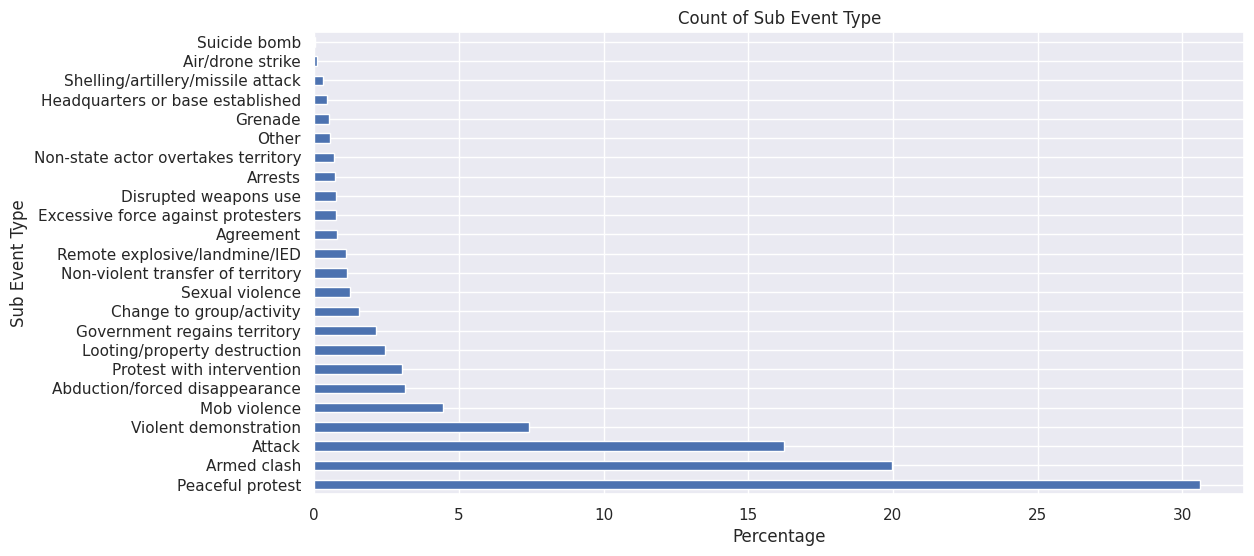

In [10]:
(national_df["sub_event_type"].value_counts(normalize=True)*100).plot(kind='barh',
                            title='Count of Sub Event Type',ylabel='Sub Event Type', xlabel='Percentage');

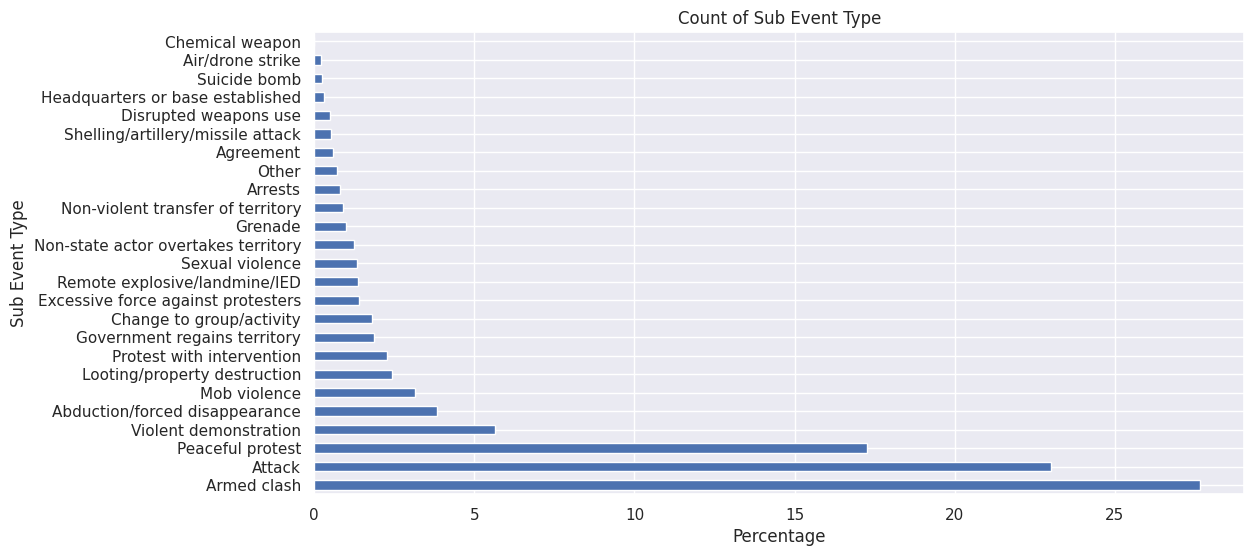

In [11]:
(data["sub_event_type"].value_counts(normalize=True)*100).plot(kind='barh',
                            title='Count of Sub Event Type',ylabel='Sub Event Type', xlabel='Percentage');

In [12]:
international_df = data[data['source_scale'] == 'International']
international_df

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
141,12,ALG142,142,01-janvier-1998,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Relizane,Relizane,NaN,Relizane,35742,559,1,Pittsburgh Post-Gazette,International,1 January 1998 Pittsburgh Post-Gazette: Sevent...,78,1594684623
143,12,ALG145,145,10-janvier-1998,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Bouira,Bouira,NaN,Bouira,"36,38",3901,1,The Advertiser,International,12 January Adealide Advertiser- 26 villagers f...,26,1572403783
144,12,ALG146,146,10-janvier-1998,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Medea,Tablat,NaN,Tablat,36413,"3,31",1,The Advertiser,International,12 January 1998 Adelaide Advertiser 20 civilia...,20,1572403783
145,12,ALG144,144,10-janvier-1998,1998,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tiaret,Chehaima,NaN,Ain es Saiada,"34,9",1383,1,The Advertiser,International,12 Jan Adelaide Advertiser- nine members of a ...,9,1572403783
147,12,ALG148,148,18-janvier-1998,1998,1,Explosions/Remote violence,Remote explosive/landmine/IED,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Alger,Sidi M'Hamed,NaN,Algiers,36752,3042,1,The Guardian,International,21 January 1998 The Guardian- a bomb destroyed...,1,1592863378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,404,KEN308,308,24-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,4,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,47,Eastern Africa,Kenya,Wajir,Wajir East,Township,Tuli,1643,40343,1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,29,1553544833
65523,404,KEN311,311,25-octobre-1998,1998,1,Riots,Mob violence,Rioters (Kenya),Christian Group (Kenya),5,Rioters (Kenya),Christian Group (Kenya),5,55,Eastern Africa,Kenya,Kakamega,Lurambi,Sheywe,Kakamega,283,"34,75",1,Reuters,International,Chaos as dispute over church leadership leads ...,0,1552577673
65524,404,KEN312,312,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,4,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,47,Eastern Africa,Kenya,Wajir,Eldas,Eldas,El Das,2533,"39,55",1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673
65525,404,KEN314,314,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,4,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,47,Eastern Africa,Kenya,Wajir,Wajir East,Township,Wajir,"1,75","40,06",2,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673


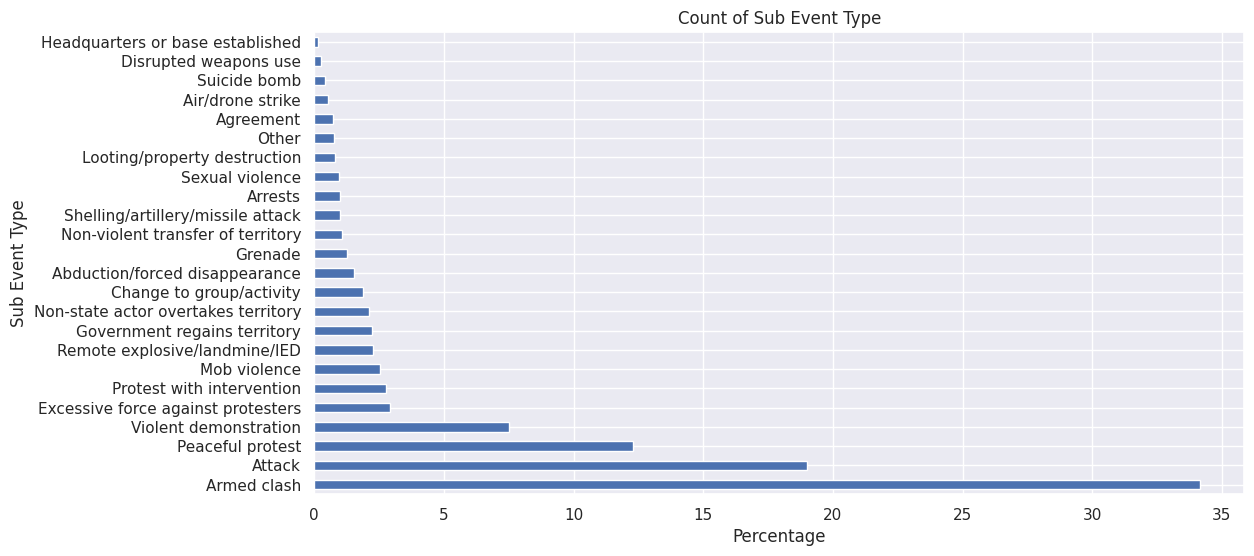

In [13]:
(international_df["sub_event_type"].value_counts(normalize=True)*100).plot(kind='barh',
                            title='Count of Sub Event Type',ylabel='Sub Event Type', xlabel='Percentage');

In [14]:
international_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13092 entries, 141 to 65529
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   iso               13092 non-null  int64 
 1   event_id_cnty     13092 non-null  object
 2   event_id_no_cnty  13092 non-null  int64 
 3   event_date        13092 non-null  object
 4   year              13092 non-null  int64 
 5   time_precision    13092 non-null  int64 
 6   event_type        13092 non-null  object
 7   sub_event_type    13092 non-null  object
 8   actor1            13092 non-null  object
 9   assoc_actor_1     2505 non-null   object
 10  inter1            13092 non-null  int64 
 11  actor2            10676 non-null  object
 12  assoc_actor_2     2076 non-null   object
 13  inter2            13092 non-null  int64 
 14  interaction       13092 non-null  int64 
 15  region            13092 non-null  object
 16  country           13092 non-null  object
 17  admin1         

In [15]:
national_df.isna().sum()

iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1       17572
inter1                  0
actor2               9030
assoc_actor_2       20419
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                  0
admin3               7824
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                 502
fatalities              0
timestamp               0
dtype: int64

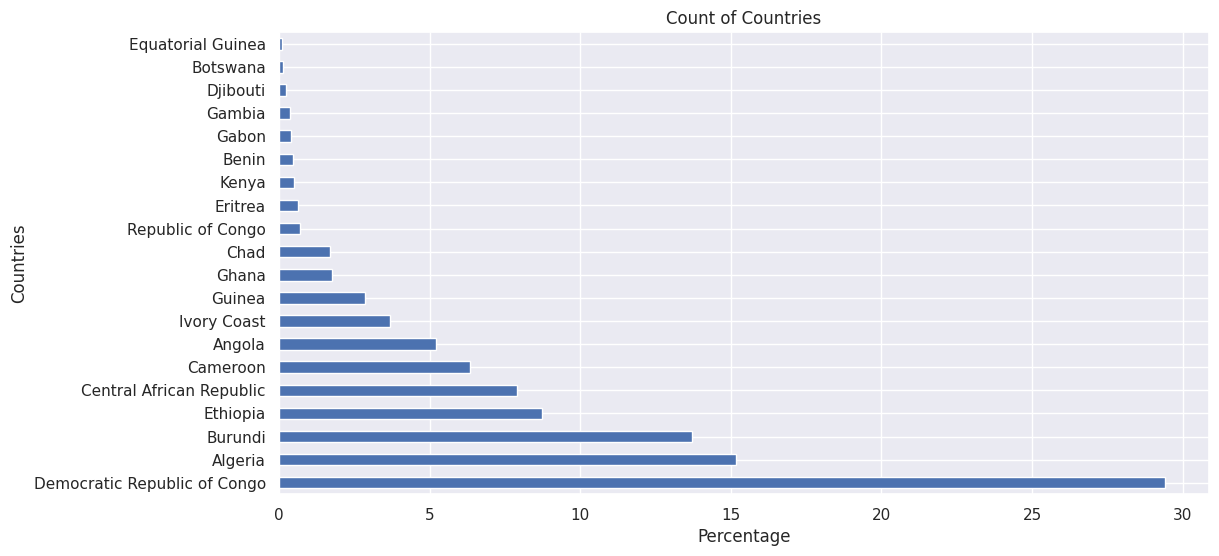

In [16]:
(data["country"].value_counts(normalize=True)*100).plot(kind='barh',
                            title='Count of Countries',ylabel='Countries', xlabel='Percentage');

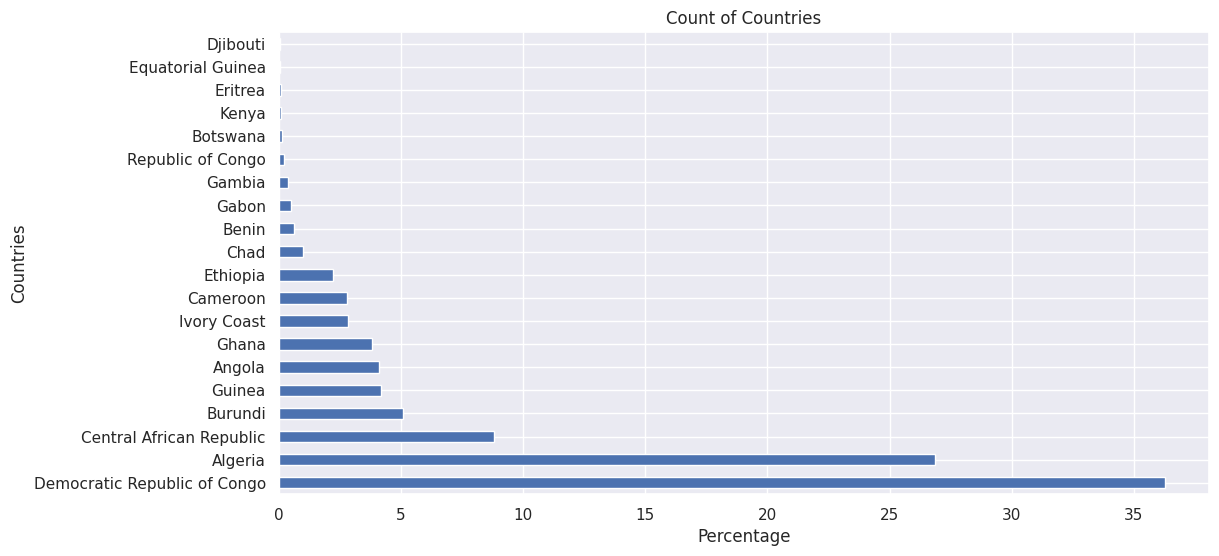

In [17]:
(national_df["country"].value_counts(normalize=True)*100).plot(kind='barh',
                            title='Count of Countries',ylabel='Countries', xlabel='Percentage');

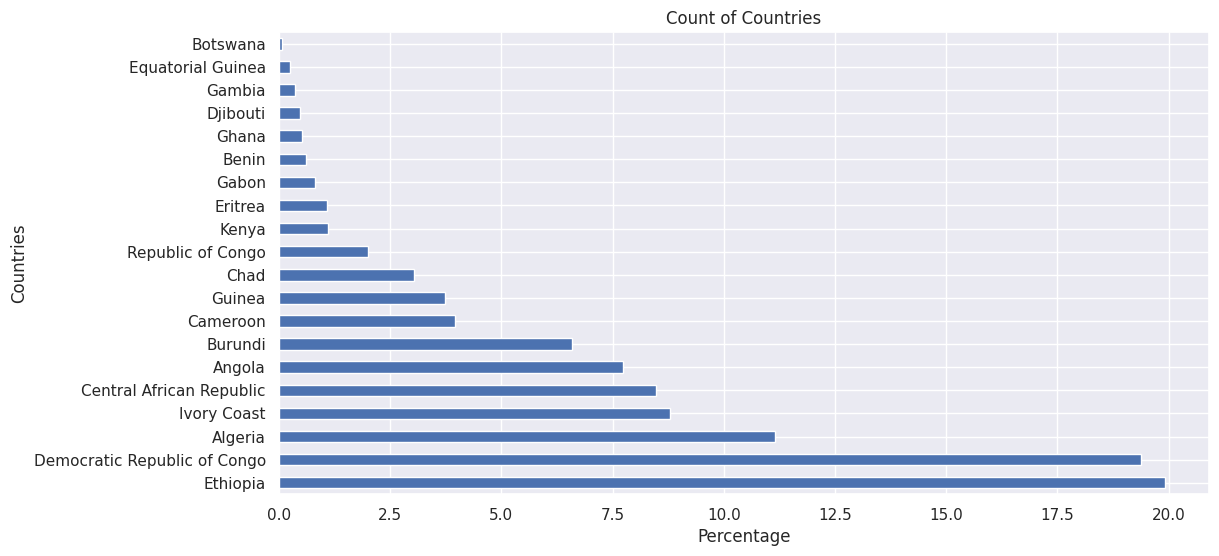

In [18]:
(international_df["country"].value_counts(normalize=True)*100).plot(kind='barh',
                            title='Count of Countries',ylabel='Countries', xlabel='Percentage');

In [19]:
import pandas as pd

combined_df = pd.concat([national_df, international_df], axis=0)
combined_df

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
193,12,ALG194,194,23-avril-1999,1999,1,Strategic developments,Change to group/activity,GSPC: Salafist Group for Call and Combat,NaN,2,NaN,NaN,0,20,Northern Africa,Algeria,Tizi Ouzou,Tizi Ouzou,NaN,Tizi Ouzou,36712,4046,3,La Tribune (Algeria),National,Formation of armed group: A meeting was held o...,0,1604354644
196,12,ALG197,197,12-juillet-1999,1999,1,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,2,GSPC: Salafist Group for Call and Combat,NaN,2,22,Northern Africa,Algeria,Bouira,Lakhdaria,NaN,Lakhdaria,36565,3593,1,Liberte (Algeria),National,Reports that two GSPC militants killed one ano...,2,1579554014
197,12,ALG198,198,12-juillet-1999,1999,2,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,2,Military Forces of Algeria (1999-),NaN,1,12,Northern Africa,Algeria,Boumerdes,Zemmouri,NaN,Zemmouri,36785,3604,2,Liberte (Algeria),National,"In Boumerdes, the security forces killed a mil...",1,1579554013
198,12,ALG199,199,15-juillet-1999,1999,3,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,2,Military Forces of Algeria (1999-),NaN,1,12,Northern Africa,Algeria,Bouira,Haizer,NaN,Haizer,36424,4018,2,Le Matin (Algeria),National,"Emir Mezouane, commander of the Salafi Group f...",1,1561468958
203,12,ALG204,204,04-septembre-1999,1999,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tizi Ouzou,Draa El Mizan,NaN,Draa El Mizan,36535,3834,1,Liberte (Algeria),National,A group of militants responsible for the killi...,9,1579554014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,404,KEN308,308,24-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,4,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,47,Eastern Africa,Kenya,Wajir,Wajir East,Township,Tuli,1643,40343,1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,29,1553544833
65523,404,KEN311,311,25-octobre-1998,1998,1,Riots,Mob violence,Rioters (Kenya),Christian Group (Kenya),5,Rioters (Kenya),Christian Group (Kenya),5,55,Eastern Africa,Kenya,Kakamega,Lurambi,Sheywe,Kakamega,283,"34,75",1,Reuters,International,Chaos as dispute over church leadership leads ...,0,1552577673
65524,404,KEN312,312,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,4,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,47,Eastern Africa,Kenya,Wajir,Eldas,Eldas,El Das,2533,"39,55",1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673
65525,404,KEN314,314,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,4,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,47,Eastern Africa,Kenya,Wajir,Wajir East,Township,Wajir,"1,75","40,06",2,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673


In [49]:
final = combined_df
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36871 entries, 193 to 65529
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   iso               36871 non-null  int64 
 1   event_id_cnty     36871 non-null  object
 2   event_id_no_cnty  36871 non-null  int64 
 3   event_date        36871 non-null  object
 4   year              36871 non-null  int64 
 5   time_precision    36871 non-null  int64 
 6   event_type        36871 non-null  object
 7   sub_event_type    36871 non-null  object
 8   actor1            36871 non-null  object
 9   assoc_actor_1     8712 non-null   object
 10  inter1            36871 non-null  int64 
 11  actor2            25425 non-null  object
 12  assoc_actor_2     5436 non-null   object
 13  inter2            36871 non-null  int64 
 14  interaction       36871 non-null  int64 
 15  region            36871 non-null  object
 16  country           36871 non-null  object
 17  admin1         

In [50]:
final.isna().sum()

iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1       28159
inter1                  0
actor2              11446
assoc_actor_2       31435
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                  0
admin3              10099
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                1264
fatalities              0
timestamp               0
dtype: int64

In [51]:
final

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
193,12,ALG194,194,23-avril-1999,1999,1,Strategic developments,Change to group/activity,GSPC: Salafist Group for Call and Combat,NaN,2,NaN,NaN,0,20,Northern Africa,Algeria,Tizi Ouzou,Tizi Ouzou,NaN,Tizi Ouzou,36712,4046,3,La Tribune (Algeria),National,Formation of armed group: A meeting was held o...,0,1604354644
196,12,ALG197,197,12-juillet-1999,1999,1,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,2,GSPC: Salafist Group for Call and Combat,NaN,2,22,Northern Africa,Algeria,Bouira,Lakhdaria,NaN,Lakhdaria,36565,3593,1,Liberte (Algeria),National,Reports that two GSPC militants killed one ano...,2,1579554014
197,12,ALG198,198,12-juillet-1999,1999,2,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,2,Military Forces of Algeria (1999-),NaN,1,12,Northern Africa,Algeria,Boumerdes,Zemmouri,NaN,Zemmouri,36785,3604,2,Liberte (Algeria),National,"In Boumerdes, the security forces killed a mil...",1,1579554013
198,12,ALG199,199,15-juillet-1999,1999,3,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,NaN,2,Military Forces of Algeria (1999-),NaN,1,12,Northern Africa,Algeria,Bouira,Haizer,NaN,Haizer,36424,4018,2,Le Matin (Algeria),National,"Emir Mezouane, commander of the Salafi Group f...",1,1561468958
203,12,ALG204,204,04-septembre-1999,1999,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tizi Ouzou,Draa El Mizan,NaN,Draa El Mizan,36535,3834,1,Liberte (Algeria),National,A group of militants responsible for the killi...,9,1579554014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,404,KEN308,308,24-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,4,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,47,Eastern Africa,Kenya,Wajir,Wajir East,Township,Tuli,1643,40343,1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,29,1553544833
65523,404,KEN311,311,25-octobre-1998,1998,1,Riots,Mob violence,Rioters (Kenya),Christian Group (Kenya),5,Rioters (Kenya),Christian Group (Kenya),5,55,Eastern Africa,Kenya,Kakamega,Lurambi,Sheywe,Kakamega,283,"34,75",1,Reuters,International,Chaos as dispute over church leadership leads ...,0,1552577673
65524,404,KEN312,312,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,4,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,47,Eastern Africa,Kenya,Wajir,Eldas,Eldas,El Das,2533,"39,55",1,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673
65525,404,KEN314,314,25-octobre-1998,1998,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),OLF: Oromo Liberation Front,4,Civilians (Kenya),Degodia Ethnic Group (Kenya),7,47,Eastern Africa,Kenya,Wajir,Wajir East,Township,Wajir,"1,75","40,06",2,Reuters,International,Ethnic raiders and OLF attack Degodia Somali e...,28,1552577673


In [52]:
final=final.drop("timestamp",axis=1)
final=final.drop("notes",axis=1)
final=final.drop("longitude",axis=1)
final=final.drop("latitude",axis=1)
finaaggl=final.drop("admin3",axis=1)
final=final.drop("assoc_actor_2",axis=1)
final=final.drop("assoc_actor_1",axis=1)
final=final.drop("iso",axis=1)
final=final.drop("event_id_cnty",axis=1)
final=final.drop("event_id_no_cnty",axis=1)
final=final.drop("year",axis=1)
final=final.drop("event_date",axis=1)

In [53]:
final

,time_precision,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,region,country,admin1,admin2,admin3,location,geo_precision,source,source_scale,fatalities
193,1,Strategic developments,Change to group/activity,GSPC: Salafist Group for Call and Combat,2,NaN,0,20,Northern Africa,Algeria,Tizi Ouzou,Tizi Ouzou,NaN,Tizi Ouzou,3,La Tribune (Algeria),National,0
196,1,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,2,GSPC: Salafist Group for Call and Combat,2,22,Northern Africa,Algeria,Bouira,Lakhdaria,NaN,Lakhdaria,1,Liberte (Algeria),National,2
197,2,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,2,Military Forces of Algeria (1999-),1,12,Northern Africa,Algeria,Boumerdes,Zemmouri,NaN,Zemmouri,2,Liberte (Algeria),National,1
198,3,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,2,Military Forces of Algeria (1999-),1,12,Northern Africa,Algeria,Bouira,Haizer,NaN,Haizer,2,Le Matin (Algeria),National,1
203,1,Violence against civilians,Attack,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Tizi Ouzou,Draa El Mizan,NaN,Draa El Mizan,1,Liberte (Algeria),National,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),4,Civilians (Kenya),7,47,Eastern Africa,Kenya,Wajir,Wajir East,Township,Tuli,1,Reuters,International,29
65523,1,Riots,Mob violence,Rioters (Kenya),5,Rioters (Kenya),5,55,Eastern Africa,Kenya,Kakamega,Lurambi,Sheywe,Kakamega,1,Reuters,International,0
65524,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),4,Civilians (Kenya),7,47,Eastern Africa,Kenya,Wajir,Eldas,Eldas,El Das,1,Reuters,International,28
65525,1,Violence against civilians,Attack,Borana Ethnic Militia (Ethiopia),4,Civilians (Kenya),7,47,Eastern Africa,Kenya,Wajir,Wajir East,Township,Wajir,2,Reuters,International,28


In [54]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36871 entries, 193 to 65529
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   time_precision  36871 non-null  int64 
 1   event_type      36871 non-null  object
 2   sub_event_type  36871 non-null  object
 3   actor1          36871 non-null  object
 4   inter1          36871 non-null  int64 
 5   actor2          25425 non-null  object
 6   inter2          36871 non-null  int64 
 7   interaction     36871 non-null  int64 
 8   region          36871 non-null  object
 9   country         36871 non-null  object
 10  admin1          36871 non-null  object
 11  admin2          36871 non-null  object
 12  admin3          26772 non-null  object
 13  location        36871 non-null  object
 14  geo_precision   36871 non-null  int64 
 15  source          36871 non-null  object
 16  source_scale    36871 non-null  object
 17  fatalities      36871 non-null  int64 
dtypes: int64(

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in final.columns:
    if final[column].dtype == 'object':  
        final[column] = label_encoder.fit_transform(final[column])
final

,time_precision,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,region,country,admin1,admin2,admin3,location,geo_precision,source,source_scale,fatalities
193,1,4,6,313,2,1067,0,20,2,0,275,1567,1871,5222,3,917,1,0
196,1,0,3,313,2,302,2,22,2,0,46,953,1871,3137,1,993,1,2
197,2,0,3,313,2,569,1,12,2,0,47,1652,1871,5514,2,993,1,1
198,3,0,3,313,2,569,1,12,2,0,46,725,1871,2134,2,953,1,1
203,1,5,5,308,2,151,7,27,2,0,275,557,1871,1623,1,993,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65522,1,5,5,137,4,175,7,47,0,18,289,1606,1761,5304,1,1213,0,29
65523,1,3,13,1098,5,924,5,55,0,18,119,1011,1672,2421,1,1213,0,0
65524,1,5,5,137,4,175,7,47,0,18,289,623,526,1702,1,1213,0,28
65525,1,5,5,137,4,175,7,47,0,18,289,1606,1761,5362,2,1213,0,28


In [56]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X=final.drop("source_scale",axis=1)
y=final["source_scale"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [57]:
LR = LogisticRegression()
LR.fit(X_trainX,y_train)
y_pred_lr=LR.predict(X_test)
accuracy_score(y_test,y_pred_lr)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7011282273812107

In [58]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_trainX,y_train)
y_pred_gnb=gnb.predict(X_test)
accuracy_score(y_test,y_pred_gnb)

0.6793230635712736

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_trainX,y_train)
y_pred_knn=knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.9323063571273595

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(X_trainX,y_train)

y_pred_dt=dt.predict(X_test)
accuracy_score(y_test,y_pred_dt)

1.0

In [65]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3273
           1       0.94      0.96      0.95      5945

    accuracy                           0.93      9218
   macro avg       0.93      0.92      0.93      9218
weighted avg       0.93      0.93      0.93      9218



In [66]:
feature_importance = dt.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

           Feature  Importance
15          source    0.755883
8           region    0.089684
9          country    0.079053
7      interaction    0.021751
4           inter1    0.012548
16      fatalities    0.010373
3           actor1    0.005849
5           actor2    0.005134
10          admin1    0.003784
12          admin3    0.003293
13        location    0.003106
0   time_precision    0.002542
11          admin2    0.001869
1       event_type    0.001693
6           inter2    0.001381
2   sub_event_type    0.001366
14   geo_precision    0.000692


In [67]:
final=final.drop("source",axis=1)

In [68]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X=final.drop("source_scale",axis=1)
y=final["source_scale"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [69]:
LR1 = LogisticRegression()
LR1.fit(X_trainX,y_train)
y_pred_lr1=LR1.predict(X_test)
accuracy_score(y_test,y_pred_lr1)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.6787806465610762

In [70]:
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gnb1.fit(X_trainX,y_train)
y_pred_gnb1=gnb1.predict(X_test)
accuracy_score(y_test,y_pred_gnb1)

0.6341939683228466

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_trainX,y_train)
y_pred_knn1=knn1.predict(X_test)
accuracy_score(y_test,y_pred_knn1)

0.8553916250813626

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()
dt1.fit(X_trainX,y_train)

y_pred_dt1=dt1.predict(X_test)
accuracy_score(y_test,y_pred_dt1)

0.9619223258841397

In [73]:
feature_importance = dt1.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

           Feature  Importance
9          country    0.120776
3           actor1    0.098934
13        location    0.098150
8           region    0.096776
7      interaction    0.095945
15      fatalities    0.084110
11          admin2    0.071716
5           actor2    0.071106
12          admin3    0.065538
10          admin1    0.056977
2   sub_event_type    0.037272
14   geo_precision    0.031504
0   time_precision    0.021852
1       event_type    0.018339
6           inter2    0.016332
4           inter1    0.014673


In [74]:
print(classification_report(y_test, y_pred_dt1))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3273
           1       0.97      0.97      0.97      5945

    accuracy                           0.96      9218
   macro avg       0.96      0.96      0.96      9218
weighted avg       0.96      0.96      0.96      9218

